In [13]:
import numpy as np
import matplotlib.pyplot as plt

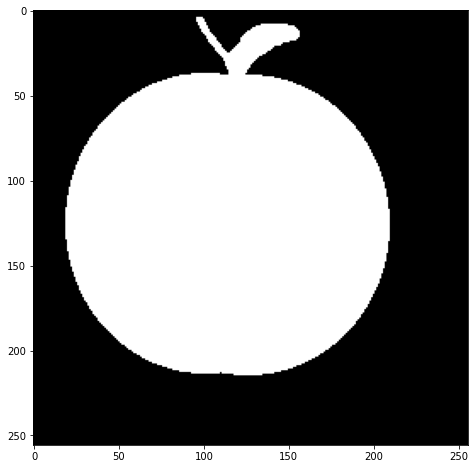

In [14]:
# Imagem de uma maçã
apple_img = plt.imread('Imgs/apple.gif')
plt.figure(figsize=[8, 8])
_ = plt.imshow(apple_img, 'gray')

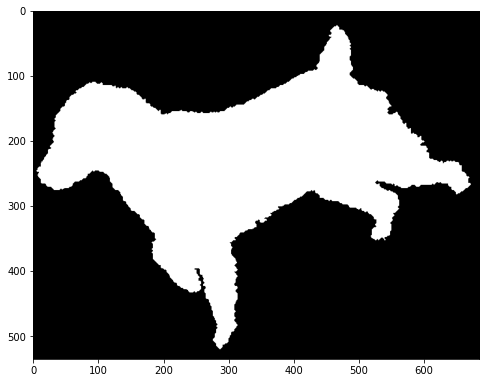

In [15]:
# Imagem de um cachorro
dog_img = plt.imread('Imgs/dog.gif')
plt.figure(figsize=[8, 8])
_ = plt.imshow(dog_img, 'gray')

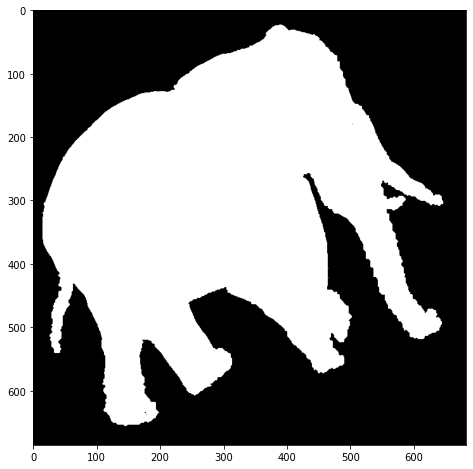

In [16]:
# Imagem de um elefante
elephant_img = plt.imread('Imgs/elephant.gif')
plt.figure(figsize=[8, 8])
_ = plt.imshow(elephant_img, 'gray')

In [17]:
def skeleton_shape(img):
  num_rows, num_cols = img.shape  
  img_padded = np.pad(img, ((1, 1), (1, 1)), 
                             mode='constant')
  change = 1 
  # index dos vizinhos
  nei_list = [(-1, 0), (-1, 1), (0, 1), (1, 1), 
              (1, 0), (1, -1), (0, -1), (-1,-1)]
  while(change):
    change = 0
    # PASSO 1
    removed_pixels_ind = []
    for row in range(1, num_rows+1): 
      for col in range(1, num_cols+1):
        # conferindo se o pixel pertence ao objeto
        if img_padded[row][col] != 0:
          
          # separando os vizinhos
          neighbours = []
          non_null_neighbours = 0                         
          for nei_index in nei_list:
            # contagem de vizinhos não nulos
            if img_padded[row + nei_index[0]][col + nei_index[1]] != 0:
              non_null_neighbours += 1
            neighbours.append(img_padded[row + nei_index[0]][col + nei_index[1]])
          
          # condicoes do PASSO 1
          # (a) 2 ≤ 𝑁(𝑝1) ≤ 6
          if 2 <= non_null_neighbours and non_null_neighbours <= 6:
            
            # (b) 𝑇(𝑝1) = 1
            T = 0
            for j in range(len(neighbours) - 1):
              if neighbours[j]  == 0 and neighbours[j+1] != 0:
                T += 1
            if neighbours[7]  == 0 and neighbours[0] != 0:
              T += 1 
            if T == 1:
              
              # (c) 𝑝2𝑝4𝑝6 = 0
              if neighbours[0] == 0 or \
                 neighbours[2] == 0 or \
                 neighbours[4] == 0:
                
                # (d) 𝑝4𝑝6𝑝8 = 0
                if neighbours[2] == 0 or \
                   neighbours[4] == 0 or \
                   neighbours[6] == 0:
                    
                  removed_pixels_ind.append((row, col))
                  change = 1 # alterando o criterio de parada dada a remocao de pixel

    # REMOVENDO OS PIXELS
    for pixel in removed_pixels_ind:
      img_padded[pixel[0]][pixel[1]] = 0
              
    # PASSO 2 (mesmo procedimento do passo 1 até a condicao (b))
    removed_pixels_ind = []
    for row in range(1, num_rows+1):
      for col in range(1, num_cols+1):
        if img_padded[row][col] != 0:
          
          neighbours = []
          non_null_neighbours = 0                         
          for nei_index in nei_list:   
            if img_padded[row + nei_index[0]][col + nei_index[1]] != 0:
              non_null_neighbours += 1
            neighbours.append(img_padded[row + nei_index[0]][col + nei_index[1]])
          
        # conferindo as condicoes
          if 2 <= non_null_neighbours and non_null_neighbours <= 6:
            
            T = 0
            for j in range(len(neighbours) - 1):
              if neighbours[j]  == 0 and neighbours[j+1] != 0:
                T += 1
            if neighbours[7]  == 0 and neighbours[0] != 0:
              T += 1
            if T == 1:
              
              # (c) 𝑝2𝑝4𝑝6 = 0
              if neighbours[0] == 0 or \
                 neighbours[2] == 0 or \
                 neighbours[6] == 0:
                
                # (d) 𝑝4𝑝6𝑝8 = 0
                if neighbours[0] == 0 or \
                   neighbours[4] == 0 or \
                   neighbours[6] == 0:
                  removed_pixels_ind.append((row, col))
                  change = 1

    for pixel in removed_pixels_ind:
      img_padded[pixel[0]][pixel[1]] = 0
    
  # Retornando a imagem resultante nas proporcoes da imagem original
  return img_padded[1:-1][1:-1]

In [18]:
apple_skeleton = skeleton_shape(apple_img)
dog_skeleton = skeleton_shape(dog_img)
elephant_skeleton = skeleton_shape(elephant_img)

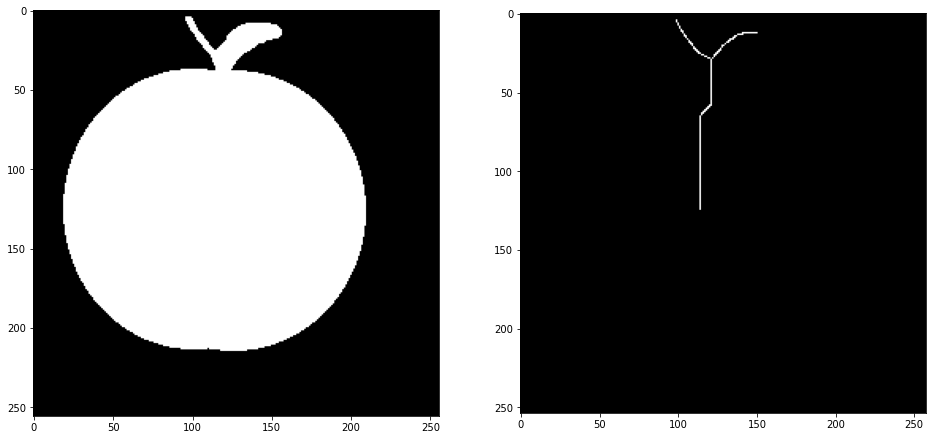

In [22]:
plt.figure(figsize=[16, 16])
plt.subplot(1, 2, 1)
plt.imshow(apple_img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(apple_skeleton, 'gray')

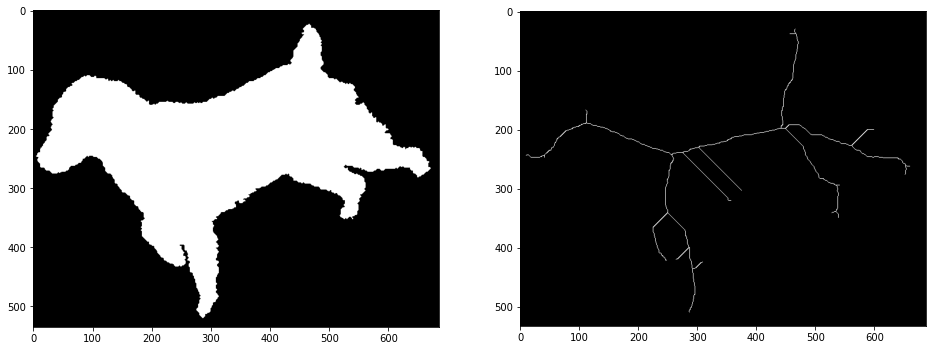

In [20]:
plt.figure(figsize=[16, 16])
plt.subplot(1, 2, 1)
plt.imshow(dog_img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(dog_skeleton, 'gray')

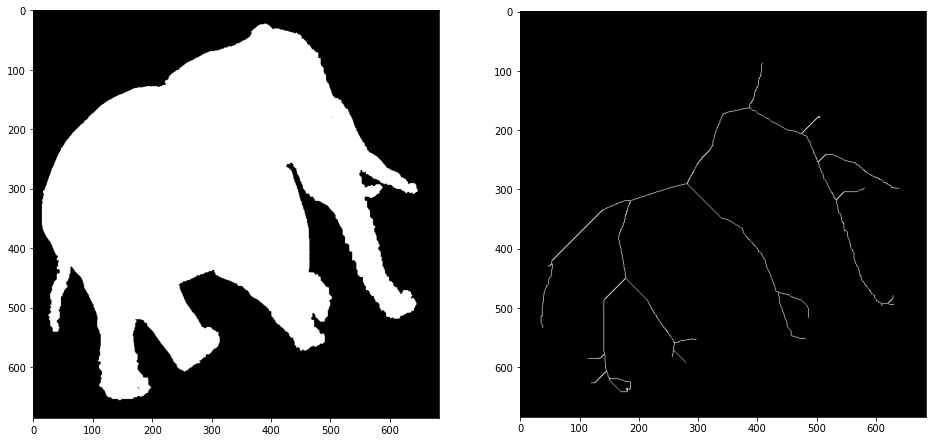

In [21]:
plt.figure(figsize=[16, 16])
plt.subplot(1, 2, 1)
plt.imshow(elephant_img, 'gray')
plt.subplot(1, 2, 2)
plt.imshow(elephant_skeleton, 'gray')